# Anaysis and preprocessing pop909

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl

from dataset.utils import load_pickle_data, save_dict
from dataset.analyse import get_track_notes_nbr, get_track_length, get_track_extreme_pitch, non_binary_notes

In [2]:
DATA_FILE = "./pop909.pkl"
INSTRUMENTS = ("MELODY", "BRIDGE", "PIANO")

In [3]:
data = load_pickle_data(DATA_FILE)

In [4]:
data["001"]["PIANO"]

[(Fraction(11, 2), 59),
 (Fraction(5, 1), 47),
 (Fraction(21, 4), 54),
 (Fraction(23, 4), 66),
 (Fraction(29, 4), 56),
 (Fraction(7, 1), 49),
 (Fraction(15, 2), 61),
 (Fraction(31, 4), 65),
 (Fraction(37, 4), 53),
 (Fraction(9, 1), 46),
 (Fraction(39, 4), 61),
 (Fraction(19, 2), 58),
 (Fraction(11, 1), 51),
 (Fraction(45, 4), 54),
 (Fraction(23, 2), 58),
 (Fraction(47, 4), 66),
 (Fraction(53, 4), 54),
 (Fraction(13, 1), 47),
 (Fraction(27, 2), 59),
 (Fraction(55, 4), 63),
 (Fraction(15, 1), 56),
 (Fraction(31, 2), 56),
 (Fraction(15, 1), 61),
 (Fraction(63, 4), 65),
 (Fraction(15, 1), 49),
 (Fraction(71, 4), 61),
 (Fraction(69, 4), 49),
 (Fraction(35, 2), 54),
 (Fraction(37, 2), 58),
 (Fraction(17, 1), 42),
 (Fraction(19, 1), 61),
 (Fraction(19, 1), 58),
 (Fraction(19, 1), 66),
 (Fraction(19, 1), 54),
 (Fraction(39, 2), 49),
 (Fraction(19, 1), 42),
 (Fraction(20, 1), 58),
 (Fraction(20, 1), 54),
 (Fraction(20, 1), 61),
 (Fraction(21, 1), 59),
 (Fraction(21, 1), 63),
 (Fraction(21, 1), 

## First look of the dataset

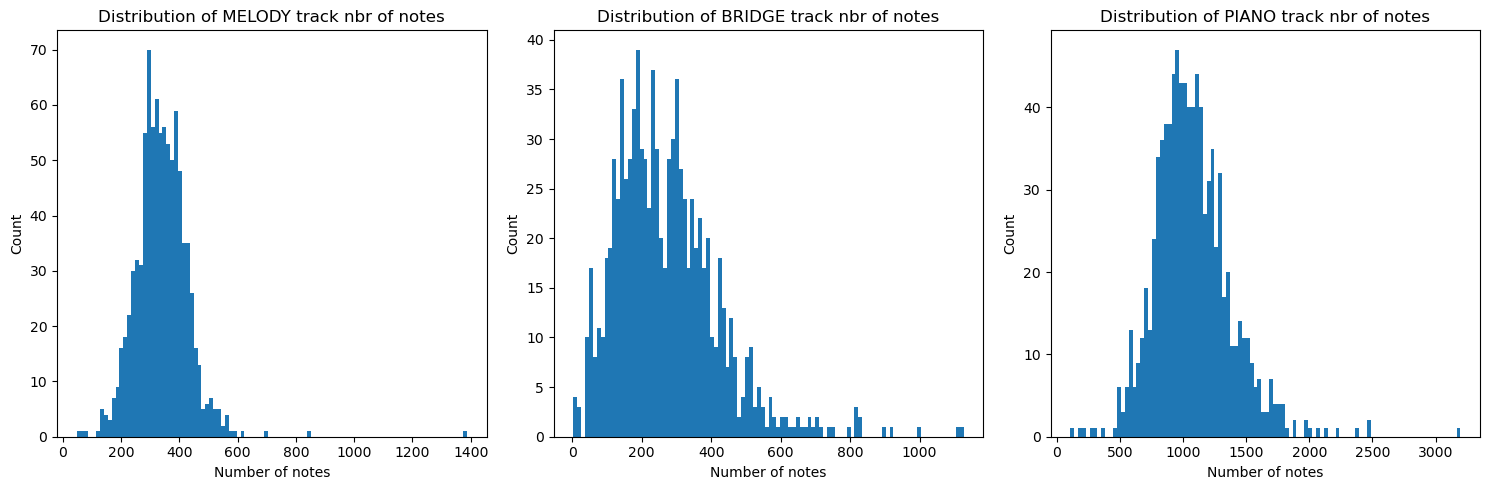

In [5]:
tracks_notes_nbr = dict()
for instrument in INSTRUMENTS:
    tracks_notes_nbr[instrument] = list()

for track in data.values():
    notes_by_ins = get_track_notes_nbr(track)
    for instrument in INSTRUMENTS:
        tracks_notes_nbr[instrument].append(notes_by_ins[instrument])

_, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, instrument in enumerate(INSTRUMENTS):
    axes[i].hist(tracks_notes_nbr[instrument], bins=100)
    axes[i].set_title(f"Distribution of {instrument} track nbr of notes")
    axes[i].set_xlabel("Number of notes")
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

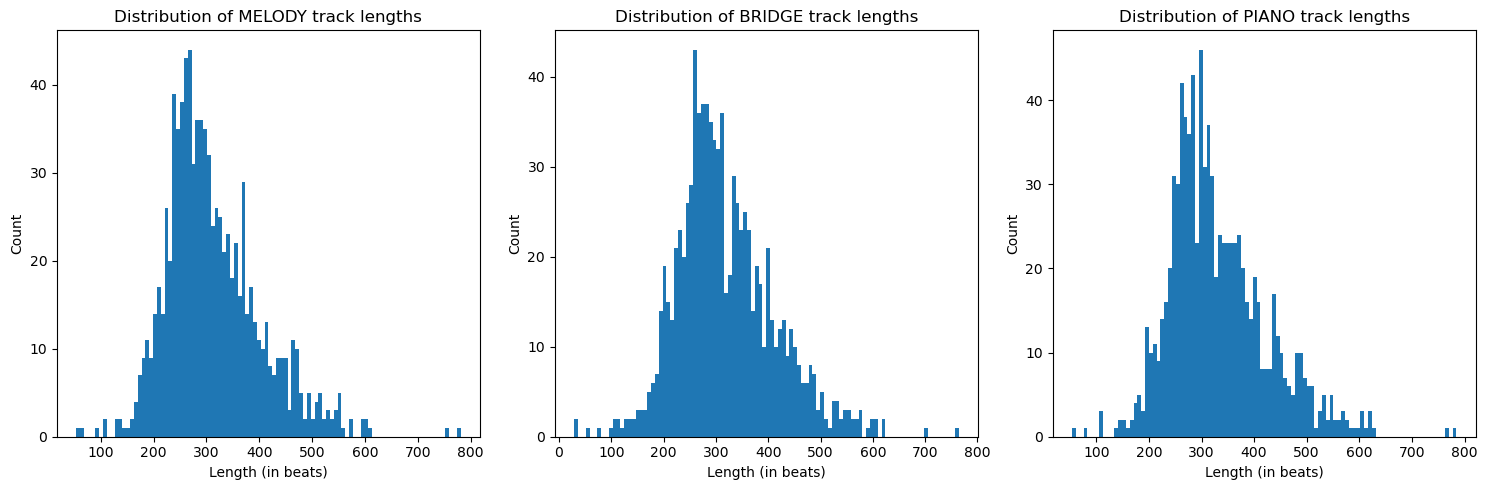

Minimum track lengths: [53.5, 29.0, 54.0]
Maximum track lengths: [781.0, 763.75, 784.5]


In [6]:
tracks_lengths = dict()
for instrument in INSTRUMENTS:
    tracks_lengths[instrument] = list()

for track in data.values():
    lengths_by_ins = get_track_length(track)
    for instrument in INSTRUMENTS:
        tracks_lengths[instrument].append(float(lengths_by_ins[instrument]))

_, axes = plt.subplots(1, 3, figsize=(15, 5))
for i, instrument in enumerate(INSTRUMENTS):
    axes[i].hist(tracks_lengths[instrument], bins=100)
    axes[i].set_title(f"Distribution of {instrument} track lengths")
    axes[i].set_xlabel("Length (in beats)")
    axes[i].set_ylabel("Count")

plt.tight_layout()
plt.show()

print(f"Minimum track lengths: {[min(tracks_lengths[instrument]) for instrument in INSTRUMENTS]}")
print(f"Maximum track lengths: {[max(tracks_lengths[instrument]) for instrument in INSTRUMENTS]}")

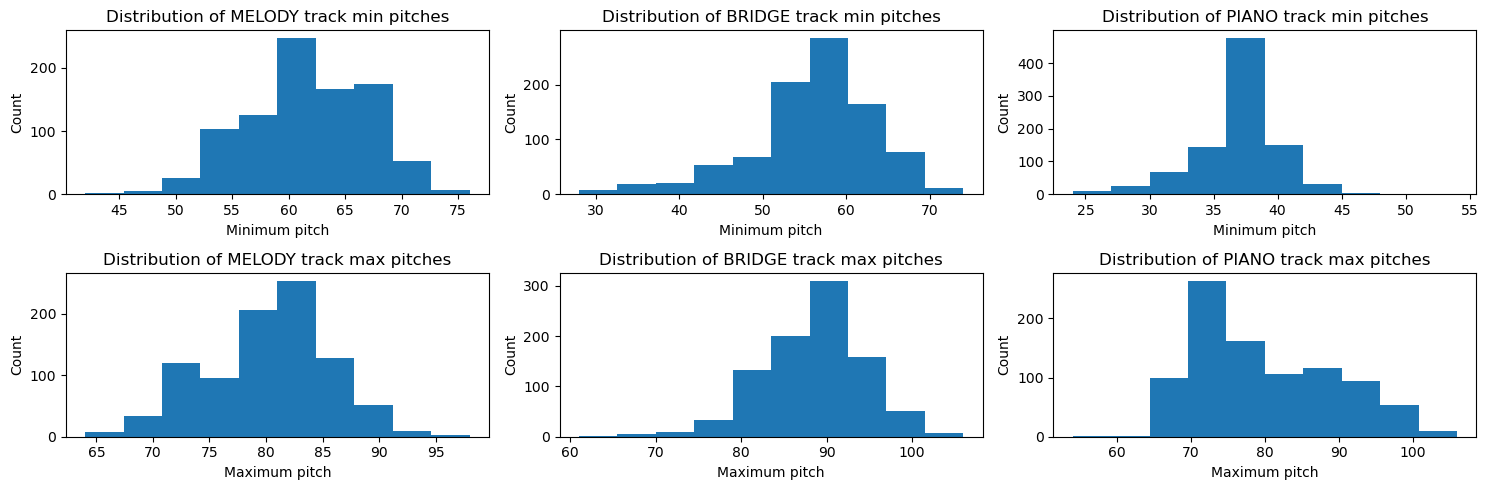

Minimum track pitch: [42, 28, 24]
Maximum track pitch: [98, 106, 106]


In [7]:
tracks_extreme_pitches = dict()
for instrument in INSTRUMENTS:
    tracks_extreme_pitches[instrument] = list()

for track in data.values():
    extreme_pitches_by_ins = get_track_extreme_pitch(track)
    for instrument in INSTRUMENTS:
        tracks_extreme_pitches[instrument].append(extreme_pitches_by_ins[instrument])

_, axes = plt.subplots(2, 3, figsize=(15, 5))
for i, instrument in enumerate(INSTRUMENTS):
    axes[0, i].hist([tracks_extreme_pitches[instrument][i][0] for i in range(len(tracks_extreme_pitches[instrument]))], bins=10)
    axes[0, i].set_title(f"Distribution of {instrument} track min pitches")
    axes[0, i].set_xlabel("Minimum pitch")
    axes[0, i].set_ylabel("Count")
    axes[1, i].hist([tracks_extreme_pitches[instrument][i][1] for i in range(len(tracks_extreme_pitches[instrument]))], bins=10)
    axes[1, i].set_title(f"Distribution of {instrument} track max pitches")
    axes[1, i].set_xlabel("Maximum pitch")
    axes[1, i].set_ylabel("Count")

plt.tight_layout()
plt.show()

print(f"Minimum track pitch: {[min(tracks_extreme_pitches[instrument][i][0] for i in range(len(tracks_extreme_pitches[instrument]))) for instrument in INSTRUMENTS]}")
print(f"Maximum track pitch: {[max(tracks_extreme_pitches[instrument][i][1] for i in range(len(tracks_extreme_pitches[instrument]))) for instrument in INSTRUMENTS]}")

Presence of extreme values and outliers to look at.

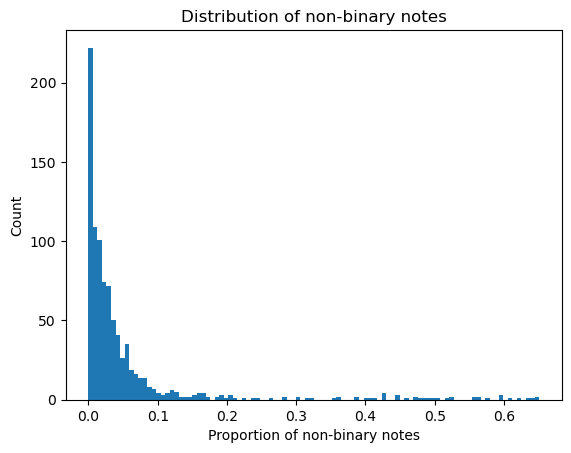

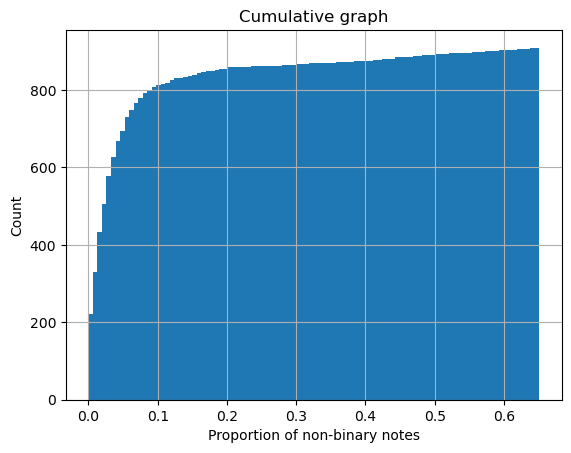

In [8]:
tracks_nbr_non_binary = dict()

for name, track in data.items():
    tracks_nbr_non_binary[name] = non_binary_notes(track)

plt.hist(tracks_nbr_non_binary.values(), bins=100)
plt.title("Distribution of non-binary notes")
plt.xlabel("Proportion of non-binary notes")
plt.ylabel("Count")
plt.show()

plt.hist(tracks_nbr_non_binary.values(), cumulative=True, bins=100)
plt.grid()
plt.title("Cumulative graph")
plt.xlabel("Proportion of non-binary notes")
plt.ylabel("Count")
plt.show()

In [9]:
print("Number of full binary tracks: ", len([i for i in tracks_nbr_non_binary.values() if i == 0]))
for per in (0.005, 0.01, 0.02, 0.03, 0.04, 0.05):
    print(f"Number of tracks with less than {per*100}% non-binary notes: ", len([i for i in tracks_nbr_non_binary.values() if i <= per]))

Number of full binary tracks:  75
Number of tracks with less than 0.5% non-binary notes:  187
Number of tracks with less than 1.0% non-binary notes:  281
Number of tracks with less than 2.0% non-binary notes:  435
Number of tracks with less than 3.0% non-binary notes:  555
Number of tracks with less than 4.0% non-binary notes:  632
Number of tracks with less than 5.0% non-binary notes:  685


Donc pour tester l'autocorelation, on peut essayer sur les 75 à 0% voir 187 morceaux à 0.5%, et pour le machine learning, pour peu que le réseau soit pas trop gros, 435 morceau c'est déjà pas mal.

In [10]:
subset0005 = [name for name, value in tracks_nbr_non_binary.items() if value <= 0.005]
subset002 = [name for name, value in tracks_nbr_non_binary.items() if value <= 0.02]

data005 = {name: data[name] for name in subset0005}
data002 = {name: data[name] for name in subset002}
save_dict(data005, "pop909_0005.pkl")
save_dict(data002, "pop909_002.pkl")